In [1]:
import sys
sys.path.insert(1, '/home/alex/Documents/Research/PEnGUIn/read/Analysis')

In [12]:
%matplotlib inline

In [3]:
from read_penguin import *
import matplotlib.pyplot as plt
import numpy as np
from Transform import *
import multiprocessing as mp
from mass_flux_2D import *
from Flow import *

In [4]:
#Loading Data
xres3d = 384
yres3d = 768
zres3d = 216
data3d = load_3D_data("/home/alex/Documents/Research/PEnGUIn/", xres3d, yres3d, zres3d, "h50_1p1J_e0_PPM4", 20)

In [5]:
def isoVel3D(x, y):
    xVals = cell_center(data3d[1])
    yVals = cell_center(data3d[2])
    zVals = cell_center(data3d[3])
    xVel = data3d[6]
    yVel = data3d[7]
    zVel = data3d[8]
    y = geo.cartesianToSpherical(y, dim = 3)
    x1 = y[0] #X Position
    x2 = y[1] #Y Position
    if(x2 < 0):
        x2 = x2%(2*np.pi) + 2*np.pi
    x3 = y[2] #Z Position
    
    xPoints = binSearch(xVals, 0, len(xVals), x1)
    yPoints = binSearch(yVals, 0, len(yVals), x2)
    zPoints = binSearch(zVals, 0, len(zVals), x3)
    if(xPoints[0] == -np.infty):
        return np.array([0,0,0])
    elif(xPoints[1] == np.infty):
        return np.array([0,0,0])
    if(yPoints[0] == -np.infty):
        yPoints = (len(yVals)-1, 0)
    elif(yPoints[1] == np.infty):
        yPoints = (0, len(yVals)-1)
    if(zPoints[1] == np.infty):
        if x3 > np.pi/2:
            return np.array([0,0,0])
        else:
            zPoints = (-1, -2)
    if(zPoints[0] == -np.infty):
        return np.array([0,0,0])
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    lowz = zPoints[0]
    highz = zPoints[1]
    
    targetCoords = (x1,x2,x3)
    minCoords = (xVals[lowx], yVals[lowy], zVals[lowz])
    maxCoords = (xVals[highx], yVals[highy], zVals[highz])
    
    xcubeVals = [xVel[lowz,lowy,lowx], xVel[highz,lowy,lowx], xVel[lowz,highy,lowx], xVel[highz,highy,lowx], xVel[lowz,lowy,highx], xVel[highz, lowy, highx], xVel[lowz, highy, highx], xVel[highz, highy, highx]]
    vx = triInterpolate(targetCoords, xcubeVals, minCoords, maxCoords)
    ycubeVals = [yVel[lowz,lowy,lowx], yVel[highz,lowy,lowx], yVel[lowz,highy,lowx], yVel[highz,highy,lowx], yVel[lowz,lowy,highx], yVel[highz, lowy, highx], yVel[lowz, highy, highx], yVel[highz, highy, highx]]
    vy = triInterpolate(targetCoords, ycubeVals, minCoords, maxCoords)
    zcubeVals = [zVel[lowz,lowy,lowx], zVel[highz,lowy,lowx], zVel[lowz,highy,lowx], zVel[highz,highy,lowx], zVel[lowz,lowy,highx], zVel[highz, lowy, highx], zVel[lowz, highy, highx], zVel[highz, highy, highx]]
    vz = triInterpolate(targetCoords, zcubeVals, minCoords, maxCoords)
    v = np.array([vx, vy, vz])
    return np.array(geo.sphericalToCartesianVelocity(y, v, dim = 3))

In [6]:
for i in range(xres3d):
    for j in range(yres3d):
        for k in range(zres3d):
            data3d[7][k,j,i] = data3d[7][k,j,i] - data3d[1][i]*np.sin(data3d[3][k])

In [17]:
coordX = np.array([-1.1 + 2.2*i/1000 for i in range(1000)])
coordY = np.array([-1.1 + 2.2*i/1000 for i in range(1000)])
coordZ = np.array([0.2*i/1000 for i in range(1000)])

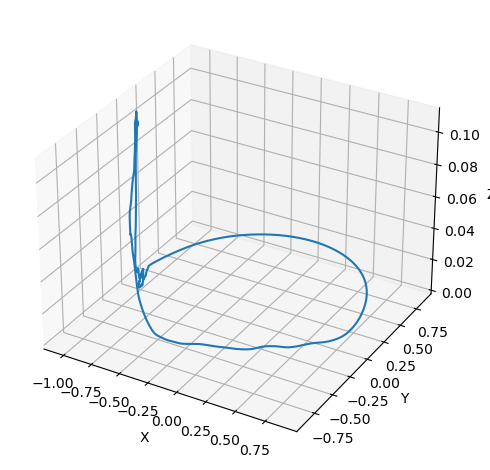

In [22]:
flow = flowLine3D(-1.0,0,0.1,coordX,coordY,coordZ, 1e-6, isoVel3D,0.1)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(flow[0], flow[1], flow[2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()